# Parts 3, 4 & 5: (Predictive Model Optimization)
# (3) Read data, Explore & Enhanced Preprocessing
# (4) Build, Compile, Train & Evaluate Manually Optimized Model
# (5) Utilize Keras Tuner for Computer Generated Optimized Model and Evaluate

---
##*Manual Optimization*

-The initial predictive model achieved an accuracy of 0.7293 with a loss of 0.5603. In an effort to enhance the algorithm, the following specific optimization techniques were used manually:

###DATA:

**OVERFITTING CONSIDERATIONS** (Unbalanced data, Unbalanced label/output representation between train/test, Model convergence):

-Shift traditional 75/25 train/test split to 80/20

**UNDERFITTING CONSIDERATIONS** (High bias/little relation):

-Outlier detection and removal within the 'ASK_AMT' column, which includes the highest variance amongst its values for entire dataset

###MODEL:

**Neuron/Node Count**

-Increasing Neuron/Node units across the first layer to = roughly 2-3x the number of input dimensions (43) - changing from 80 to 120. As the initial model's performance indicates our data is likely complex, we will include only a slight adjustment to the number of neurons for the second layer (from 30 to 50).

**Hidden Layer Count**

-Increasing the overall hidden layer count from (2) to (4) for increased perceptron interaction. With complex, likley non-linear data, more hidden layers typically perform better than less layers with more neurons. Note: the number of neurons for these third and fourth layers are initially set to match the second layer's with (50) each.

**Training Epoch Count**

-As our initial model indicates, we're achieving fluctuating returns for primarily accuracy (loss as well) above 80 Epochs. As such, we will increase  this number to 150 and note the response.

**Activation Function**

-Replacing our neural layer's activation functions with Tahn, instead of ReLU could provide a slight predictive boost. This could be attributed to the scaled nature of our input data containing values from -1 to 1, as the ReLU activation function forgoes negative outputs.


**The subsequet manually optimized model achieved the following metrics after the above techniques: Loss - 0.5414, Accuracy - 0.7513.**



---


##*Keras-Tuner Optimizaztion*

**The subsequet Keras-Tuner optimized model achieved the following metrics: Loss - 0.5408, Accuracy - 0.7484.**

-Please refer to the associated write up within the project's repository as well as the Keras-Tuner model outputs below.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
!pip install keras-tuner
import keras_tuner as kt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Outlier detection and removal within the 'ASK_AMT' column for potential model improvement
upper_q3 = application_df['ASK_AMT'].quantile(0.75)
lower_q1 = application_df['ASK_AMT'].quantile(0.25)
iqr = upper_q3 - lower_q1
upper_bound = upper_q3 + (1.5 * iqr)
lower_bound = lower_q1 - (1.5 * iqr)
potential_outliers = application_df[(application_df['ASK_AMT'] >= upper_bound) | (application_df['ASK_AMT'] <= lower_bound)]
print(f'Number of outliers to be eliminated: {len(potential_outliers)}')
print(f'--------------------------------------------------------------')
application_df = application_df[(application_df['ASK_AMT'] <= upper_bound) & (application_df['ASK_AMT'] >= lower_bound)]
application_df


Number of outliers to be eliminated: 8206
--------------------------------------------------------------


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()


,0
APPLICATION_TYPE,12
AFFILIATION,6
CLASSIFICATION,65
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,656
IS_SUCCESSFUL,2


In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_count = application_df['APPLICATION_TYPE'].value_counts()
application_type_count


,count
APPLICATION_TYPE,
T3,20086
T4,1331
T19,999
T5,894
T6,882
T8,669
T7,633
T10,508
T13,54


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_type_count[application_type_count <= cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()


<ipython-input-6-9e7a90959367>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


,count
APPLICATION_TYPE,
T3,20086
T4,1331
T19,999
T5,894
T6,882
T8,669
T7,633
T10,508
Other,91


In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_type_count = application_df['CLASSIFICATION'].value_counts()
classification_type_count


,count
CLASSIFICATION,
C1000,12557
C2000,4693
C1200,3997
C2100,1623
C3000,1537
...,...
C1732,1
C1728,1
C4120,1


In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_type_count_more_than_one = classification_type_count.loc[classification_type_count > 1]
classification_type_count_more_than_one


,count
CLASSIFICATION,
C1000,12557
C2000,4693
C1200,3997
C2100,1623
C3000,1537
C7000,546
C1700,223
C4000,129
C5000,106


In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1000
classifications_to_replace = classification_type_count[classification_type_count <= cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()


<ipython-input-9-2cab469da46a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")


,count
CLASSIFICATION,
C1000,12557
C2000,4693
C1200,3997
Other,1686
C2100,1623
C3000,1537


In [10]:
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
encoded_application_df = pd.get_dummies(application_df, dtype=int)
encoded_application_df


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = encoded_application_df['IS_SUCCESSFUL']
X = encoded_application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [14]:
# Define the model - deep neural net
input_feature_layers = len(X_train.columns)
hidden_nodes_layer_one = 120
hidden_nodes_layer_two = 50
hidden_nodes_layer_three = 50
hidden_nodes_layer_four = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_one, activation="tanh", input_dim=input_feature_layers))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_two, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_three, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_four, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           5,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,481 (64.38 KB)

 Trainable params: 16,481 (64.38 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150)


Epoch 1/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7310 - loss: 0.5678
Epoch 2/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7462 - loss: 0.5350
Epoch 3/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7498 - loss: 0.5307
Epoch 4/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7498 - loss: 0.5309
Epoch 5/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7479 - loss: 0.5331
Epoch 6/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7423 - loss: 0.5306
Epoch 7/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7513 - loss: 0.5251
Epoch 8/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7447 - loss: 0.5308
Epoch 9/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7563 - loss: 0.5171
Epoch 10/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7465 - loss: 0.5288
Epoch 11/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7511 - loss: 0.5213
Epoch 12/150
653/653 ━━━━━━━━━━━━━━━━━━━

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


164/164 - 0s - 2ms/step - accuracy: 0.7513 - loss: 0.5414
Loss: 0.5413985252380371, Accuracy: 0.7512933611869812


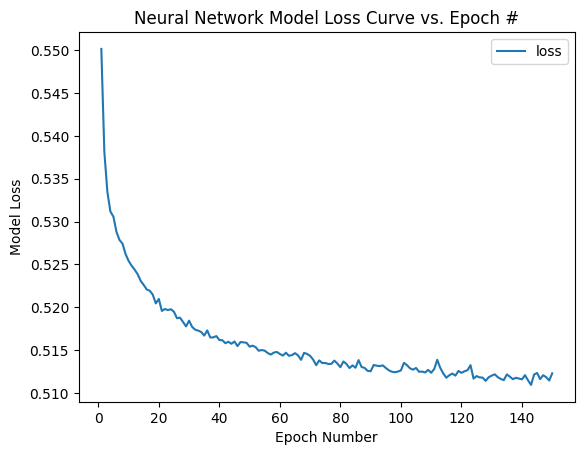

In [18]:
# Graphically evaluate the model via the "loss" metric
history_df = pd.DataFrame(fit_model.history)

# Increment the index by 1 to match epoch number
history_df.index += 1

# Corresponding "loss" metric plot
history_df.plot(y="loss")
plt.xlabel("Epoch Number")
plt.ylabel("Model Loss")
plt.title("Neural Network Model Loss Curve vs. Epoch #")
plt.show()


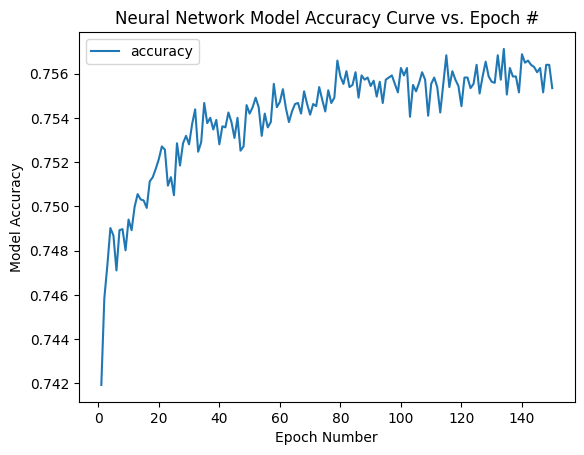

In [19]:
# Conduct the same evaluation as above but now for the accuracy metric
history_df.plot(y="accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Model Accuracy")
plt.title("Neural Network Model Accuracy Curve vs. Epoch #")
plt.show()


In [20]:
# Export our manually optimized model to HDF5/Keras file
filepath = "AlphabetSoupCharity_Manual_Optimization.keras"
nn.save(filepath)


#Keras-Tuner Model Optimization

In [21]:
# Define a function that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=32,
        max_value=128,
        step=32), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=32,
            max_value=128,
            step=32),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model


In [22]:
# Instantiate Keras Tuner instance
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)


Reloading Tuner from ./untitled_project/tuner0.json


In [23]:
# Execute the Keras Tuner search for optimal hyperparameters
tuner.search(X_train_scaled, y_train,epochs=20, validation_data=(X_test_scaled,y_test))


In [24]:
# Obtain the optimal model hyperparameters
optimal_hyperparameters = tuner.get_best_hyperparameters(1)[0]
optimal_hyperparameters.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 5,
 'units_2': 5,
 'units_3': 32,
 'units_4': 32,
 'units_5': 32,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0049'}

In [25]:
# Evaluate the retrieved optimal model against entire test data set
optimal_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = optimal_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam

164/164 - 1s - 3ms/step - accuracy: 0.7484 - loss: 0.5408
Loss: 0.5407848358154297, Accuracy: 0.7484192252159119


In [26]:
# Export our Keras-Tuner optimized model to HDF5/Keras file
filepath = "AlphabetSoupCharity_KerasTuner_Optimization.keras"
optimal_model.save(filepath)
